In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("diabetes.csv")

In [51]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


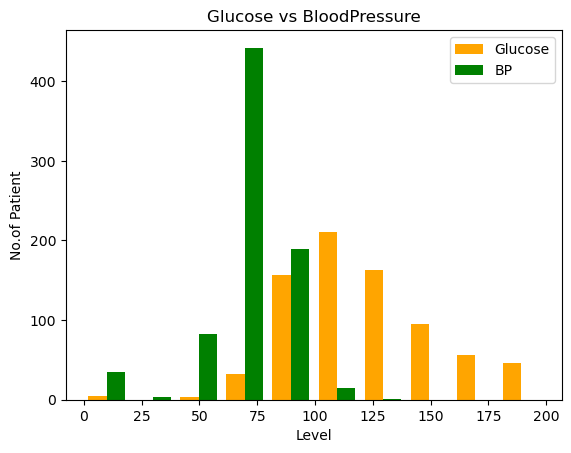

In [54]:
h1 = df['Glucose']
h2 = df['BloodPressure']
legend = ['Glucose', 'BP']
plt.hist([h1, h2], color=['orange', 'green'])
plt.xlabel("Level")
plt.ylabel("No.of Patient")
plt.legend(legend)
#plt.xticks(range(0, 3))
#plt.yticks(range(1, 2))
plt.title('Glucose vs BloodPressure')
plt.show()

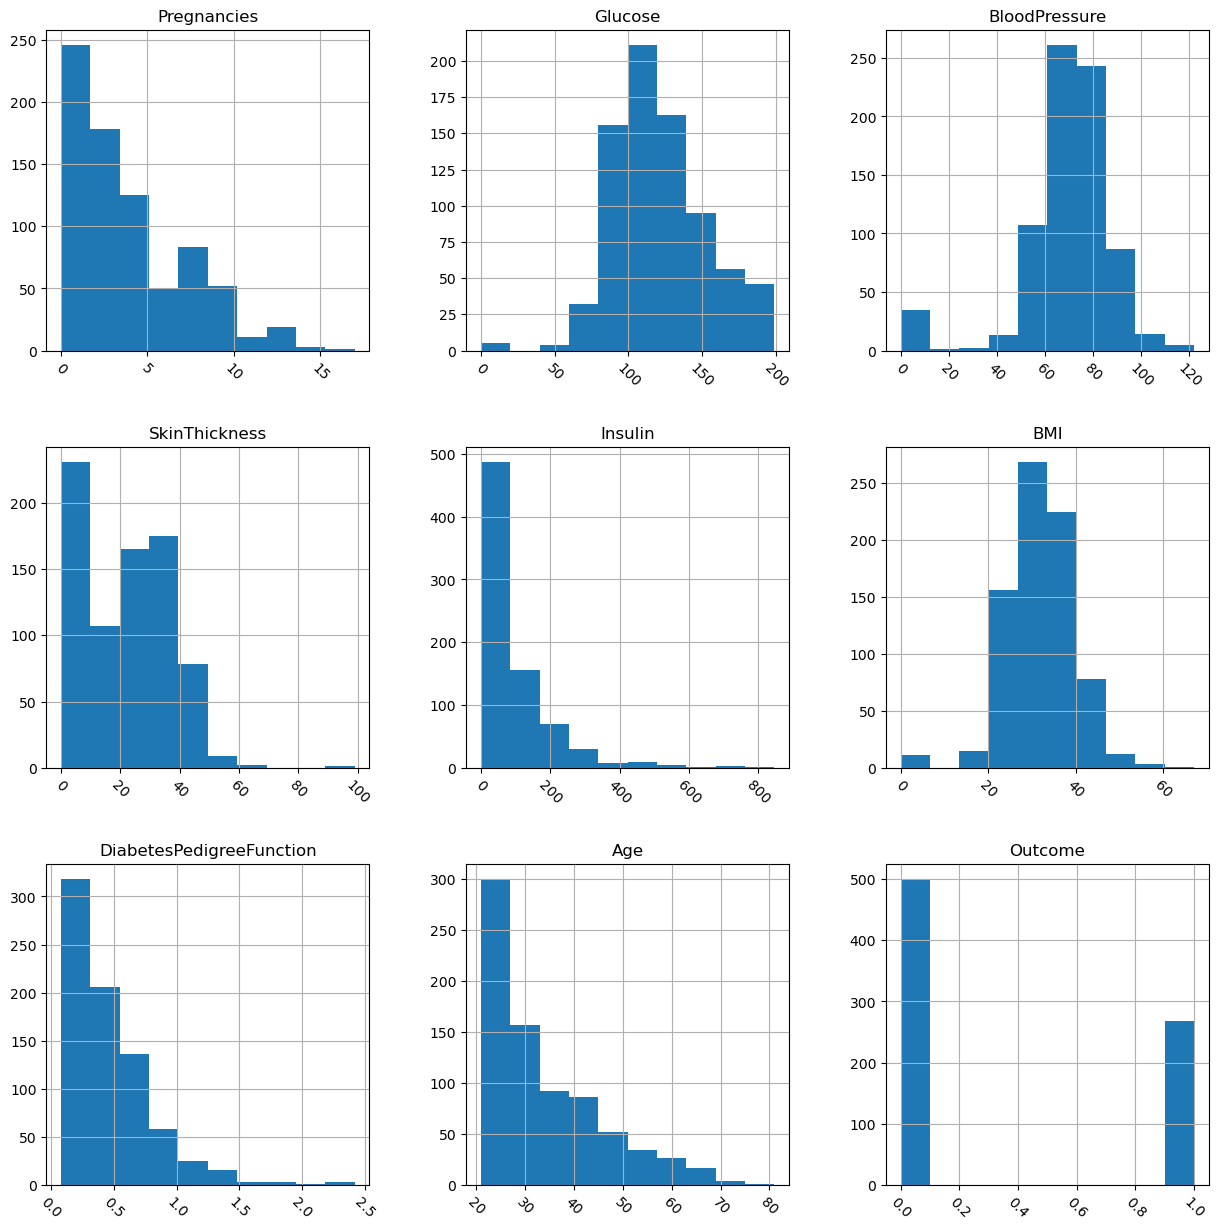

In [55]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<Axes: xlabel='BMI', ylabel='Density'>

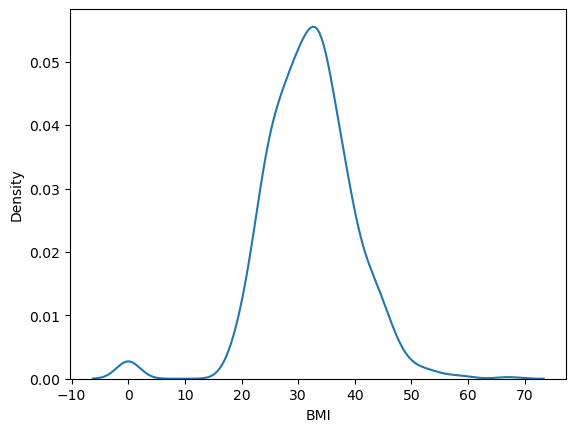

In [56]:
# Make default density plot
sns.kdeplot(df['BMI'])
#sns.plt.show()

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

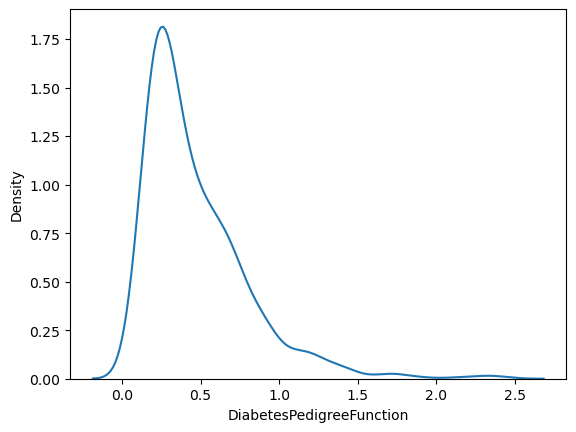

In [57]:
sns.kdeplot(df['DiabetesPedigreeFunction'])

<Axes: ylabel='DiabetesPedigreeFunction'>

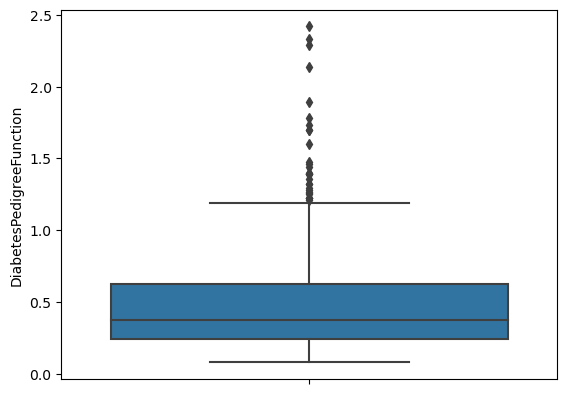

In [58]:
# Make boxplot for one group only
sns.boxplot( y=df["DiabetesPedigreeFunction"] )

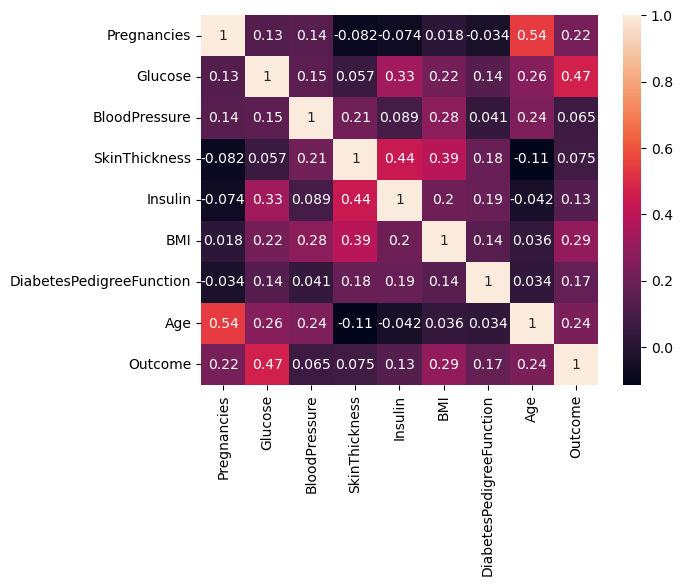

In [59]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

In [60]:
df1 = df

In [61]:
# Replacing zero values with NaN
df1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [62]:
# Count of NaN
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [63]:
# Replacing NaN with mean values
df1["Glucose"].fillna(df1["Glucose"].mean(), inplace = True)
df1["BloodPressure"].fillna(df1["BloodPressure"].mean(), inplace = True)
df1["SkinThickness"].fillna(df1["SkinThickness"].mean(), inplace = True)
df1["Insulin"].fillna(df1["Insulin"].mean(), inplace = True)
df1["BMI"].fillna(df1["BMI"].mean(), inplace = True)

In [64]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [65]:
print(df1)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

In [66]:
x=df1.iloc[:,df.columns !='Outcome']
y=df1.iloc[:,df.columns =='Outcome']

In [67]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [68]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [69]:
feature_name = x.columns.tolist()
feature_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [70]:
#Feature Selection minimizes the common factors between the varibles
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

x_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(x_norm, y)

SelectKBest(k=6, score_func=<function chi2 at 0x0000020B908683A0>)

In [71]:
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

6 selected features


['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [72]:
scores = chi_selector.scores_
scores

array([ 6.5599818 , 14.33694845,  0.65251032,  1.3481011 ,  2.16428808,
        5.05949789,  2.75858391,  8.20569067])

In [73]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = df1.iloc[:, [0,1, 4, 5,6, 7]].values
Y = df1.iloc[:, 8].values

In [74]:
X

array([[  6.        , 148.        , 155.54822335,  33.6       ,
          0.627     ,  50.        ],
       [  1.        ,  85.        , 155.54822335,  26.6       ,
          0.351     ,  31.        ],
       [  8.        , 183.        , 155.54822335,  23.3       ,
          0.672     ,  32.        ],
       ...,
       [  5.        , 121.        , 112.        ,  26.2       ,
          0.245     ,  30.        ],
       [  1.        , 126.        , 155.54822335,  30.1       ,
          0.349     ,  47.        ],
       [  1.        ,  93.        , 155.54822335,  30.4       ,
          0.315     ,  23.        ]])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)#0.3=70% train ,30%test

In [77]:
x_train.shape

(537, 6)

In [78]:
y_test.shape

(231,)

In [79]:
from sklearn import svm #classification algorithm=yes 0r no type
from sklearn import metrics

In [80]:
model1=svm.SVC()

In [81]:
model1.fit(x_train,y_train)

SVC()

In [82]:
xpredict=model1.predict(x_test)

In [83]:
svm=metrics.accuracy_score(y_test,xpredict)
print(svm)

0.7272727272727273


In [84]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, xpredict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.88      0.80       147
     class 1       0.69      0.45      0.55        84

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.71       231



In [85]:
test_vector = np.array([0,137,168,43.1,2.288,33])
test_vector=test_vector.reshape(1,-1)
p = model1.predict(test_vector)
print(p)

[1]


In [86]:
if p==1:
    if((df.iloc[0]['Glucose']>=48) and (df.iloc[0]['Age']>=45)):
        print("Diabetes Type 2 Found")
    else:
        print("Diabetes Type 1 Found")

Diabetes Type 2 Found


In [87]:
if p==1:
    if((df.loc[0]['Glucose']>=48) and (df.loc[0]['Age']<45)):
        print("Diabetes Type 2 Found")
    else:
        print("Diabetes Type 1 Found")

Diabetes Type 1 Found


In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [89]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=500, random_state=300)

In [90]:
y_pred=dtree.predict(x_test)

In [91]:
acc2=dtree.score(x_test,y_test)
acc2

0.6796536796536796

In [92]:
dtree.score(x_train,y_train)

1.0

In [93]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
clf=GaussianNB()
clf.fit(x_train, y_train)
preds=clf.predict(x_test)
print('accuracy with Naive Bayes:',accuracy_score(y_test, preds), '%')

accuracy with Naive Bayes: 0.7532467532467533 %
